In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
#Check NULL values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [11]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [12]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [13]:
male_ind = len(train[train['Sex'] == 'male'])
print("Males not found in the Titanic:", male_ind)

Males not found in the Titanic: 577


In [14]:
female_ind = len(train[train['Sex'] == 'female'])
print("Females not found in the Titanic:", female_ind)

Females not found in the Titanic: 314


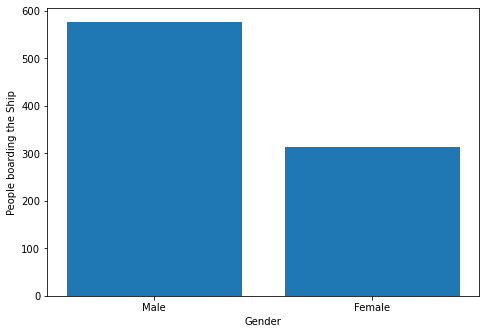

In [16]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
index = [577, 314]
axis.bar(gender, index)
plt.xlabel("Gender")
plt.ylabel("People boarding the Ship")
plt.show()

In [19]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [20]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


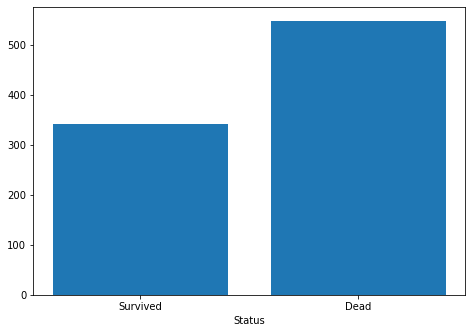

In [21]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
status = ['Survived', 'Dead']
index = [alive, dead]
axis.bar(status, index)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, 'Graph of the people according to ticket class in which people did not survive')

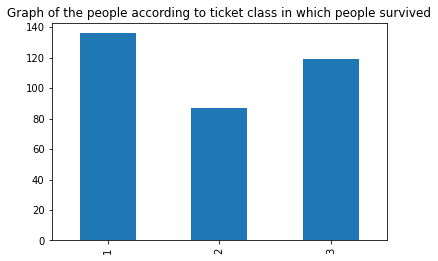

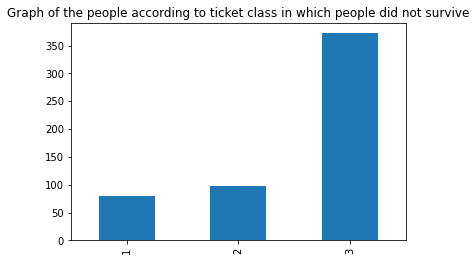

In [22]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Graph of the people according to ticket class in which people survived')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Graph of the people according to ticket class in which people did not survive')

([<matplotlib.axis.XTick at 0x1499afae700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

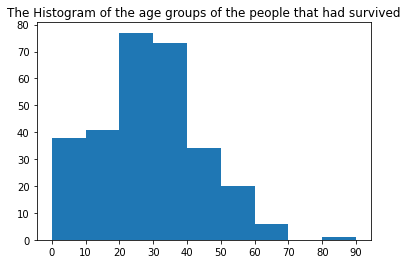

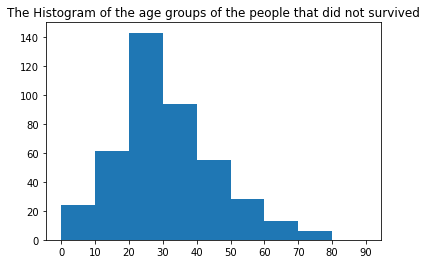

In [26]:
plt.figure(1)
age = train.loc[train.Survived == 1, 'Age']
plt.title('The Histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age = train.loc[train.Survived == 0, 'Age']
plt.title('The Histogram of the age groups of the people that did not survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [27]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [28]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [29]:
train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Age', ascending = True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [30]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


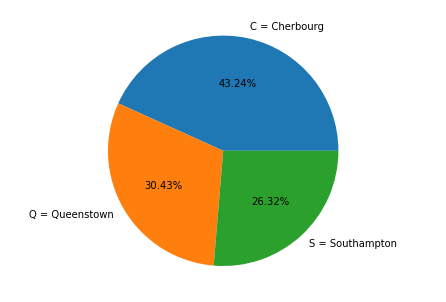

In [32]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.axis('Equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571, 0.389610, 0.336957]
axis.pie(s, labels = l, autopct = '%1.2f%%')
plt.show()

In [34]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [35]:
#Dropping All the unnecessary Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [36]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [37]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [38]:
#Selection of Features
column_train = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
#training values
X = train[column_train]
#target value
Y = train['Survived']

In [39]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [40]:
# Fill the missing values
# The column has 177 missing values
# Either we fill missing values with mean or median from existing values
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [42]:
X['Embarked'] = train['Embarked'].fillna(method = 'pad')
X['Embarked'].isnull().sum()

0

In [44]:
#Now we need to convert sex into integer value
d = {'male': 0, 'female': 1}
X['Sex'] = X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [46]:
e = {'C' : 0, 'Q' : 1, 'S' : 2}
X['Embarked'] = X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [47]:
#Training - Testing - Splitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

In [48]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.7574626865671642


In [49]:
#Confusion Matirx
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [51]:
#Using Support Vector
from sklearn.svm import SVC
model_one = SVC()
model_one.fit(X_train, Y_train)
pred_y = model_one.predict(X_test)


from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(Y_test, pred_y))

Accuracy: 0.6604477611940298


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test, pred_y)
print(confusion_mat)
print(classification_report(Y_test, pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [53]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_two = KNeighborsClassifier(n_neighbors = 5)
model_two.fit(X_train, Y_train)
y_pred2 = model_two.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(Y_test, y_pred2))

Accuracy Score: 0.6604477611940298


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [60]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [62]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_four = DecisionTreeClassifier(criterion = 'entropy', random_state = 7)
model_four.fit(X_train, Y_train)
y_pred4 = model_four.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy Score:', accuracy_score(Y_test, y_pred4))

Accuracy Score: 0.7425373134328358


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_mat = confusion_matrix(Y_test, y_pred4)
print(confusion_mat)
print(classification_report(Y_test, y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [66]:
results = pd.DataFrame( {
    'Model' : ['Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'KNN', 'Decision Tree'],
    'Score' : [0.7574626865671642, 0.6604477611940298, 0.7686567164179104, 0.6604477611940298, 0.7425373134328358]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.768657,Naive Bayes
0.757463,Logistic Regression
0.742537,Decision Tree
0.660448,Support Vector Machines
0.660448,KNN


In [67]:
#Thank You